In [55]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

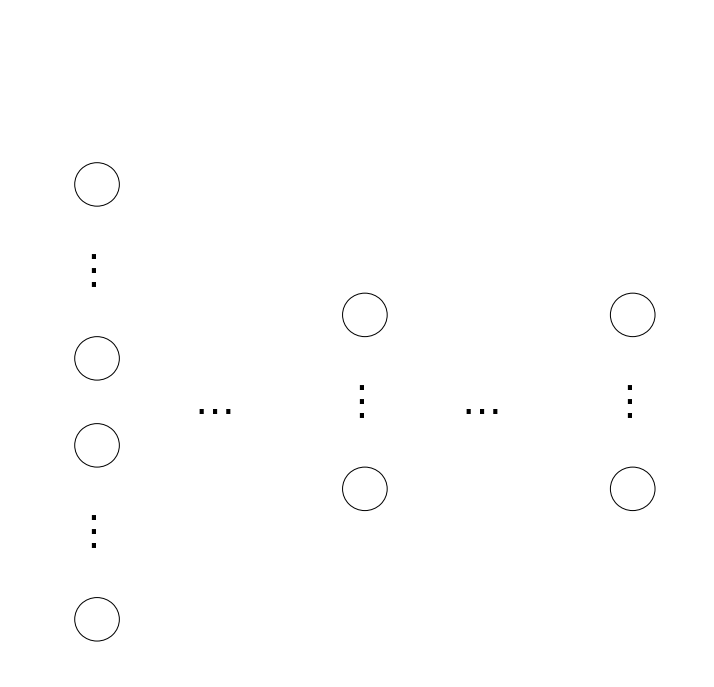

In [83]:
# make figure
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
#draw_neural_net(ax,[ 6, 3, 3, 1])
#plt.show()

# shape
shape = [6, 1, 3, 1, 3]

# number of layers 
nl = len(shape)

# figure bounds
top = 0.9
bottom = 0.1
left = 0.1
right = 0.9

# vertical and horizontal spacing
vs = (top - bottom)/float(max(shape))
hs = (right - left)/float(len(shape) - 1)

# for each layers
for i, nn in enumerate(shape):
    
    # position of top node
    lt = vs*(nn - 1)/2. + (top - bottom)/2.
    
    # for each node
    for n in range(nn):
        
        # position
        xy = (i*hs + left, lt - n*vs)
        
        # vertical continuation nodes
        if (i == 0 and n == 1) or (i == 0 and n == 4) or (i == 2 and n == 1) or (i == 4 and n == 1):
            ax.text(*xy, r'$\vdots$', horizontalalignment='right', verticalalignment='center', fontsize=40)
        # horizontal continuation nodes
        elif (i == 1 and n == 0) or (i == 3 and n == 0):
            ax.text(*xy, r'$\dots$', horizontalalignment='right', verticalalignment='center', fontsize=40)
        # regular nodes
        else:
            circ = plt.Circle(xy, vs/4., color='w', ec='k', zorder=4)
            ax.add_artist(circ)
        
plt.show()

In [ ]:
def plot_ann()

In [39]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, layer_sizes, left=0.1, right=0.9, bottom=0.1, top=0.9):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

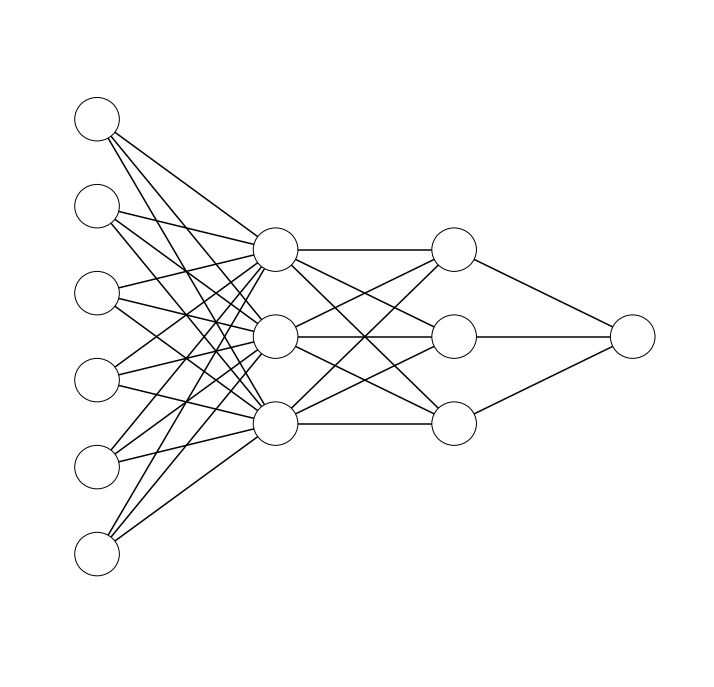

In [44]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax,[ 6, 3, 3, 1])
plt.show()